Лабораторная работа №3. Арифметические вычисления.
1. На языке ассемблера реализовать программу, которая по введенному символу печатает его ASCII-код. Символ передавать в исполняемую программу как параметр командной строки.
2. Разработать программу на языке ассемблера, в которой в соответствии с вариантом выполнить расчет значения арифметического выражения и вывести результат на экран, операторы для арифметического выражения  a b c  передаются исполняемой программе как параметры командной строки.
3. На языке программирования С составить аналогичную п.2 программу, сверить полученные результаты.

In [ ]:
import random as rd
import pandas as pd
import math

Variant = 23
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operand)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

: 

((((a-c)*b)/c)*a)

In [ ]:
format ELF64
public _start

_start:
    ; 1. Проверяем, передан ли символ (argc >= 2)
    ; [rsp] - argc, [rsp+8] - имя программы, [rsp+16] - адрес первого аргумента
    mov rax, [rsp]
    cmp rax, 2
    jl exit                 ; Если аргументов нет, выходим

    ; 2. Получаем адрес строки первого аргумента
    mov rsi, [rsp + 16]     
    
    ; 3. Извлекаем первый символ этой строки
    xor rax, rax            ; Чистим RAX
    mov al, [rsi]           ; Копируем 1 байт (код символа) в младший байт RAX
    
    ; Теперь в RAX лежит числовое значение ASCII-кода 
    
    ; 4. Вызываем функцию печати из library.asm 
    call print_int

    ; Печатаем перевод строки
    mov rax, 1
    mov rdi, 1
    mov rsi, nl
    mov rdx, 1
    syscall

exit:
    mov eax, 60
    xor edi, edi
    syscall
./
; -------------------------------- Функции ------------------ --------------
print_int:
    push rax  
    push rcx 
    push rdx
    push rdi
    push rsi

    ; Обработка отрицательного числа
    test rax, rax
    jns .prepare_convert

    push rax
    mov rax, 1          ; sys_write
    mov rdi, 1          ; stdout
    mov rsi, minus_char
    mov rdx, 1
    syscall
    pop rax
    neg rax             ; замена знака для деления
; Подготовка к конвертации числа в строку
.prepare_convert:
    mov rcx, 10
    mov rdi, print_buffer + 31
; Цикл конвертации числа в строку
.convert_loop:
    xor rdx, rdx 
    div rcx
    add dl, '0'
    mov [rdi], dl 
    dec rdi 
    test rax, rax
    jnz .convert_loop 

    inc rdi
    mov rsi, rdi
    mov rdx, print_buffer + 31
    sub rdx, rsi
    inc rdx

    mov rax, 1
    mov rdi, 1
    syscall

    pop rsi
    pop rdi
    pop rdx
    pop rcx
    pop rax
    ret

; Функция для конвертации строки в число
atoi:
    xor rax, rax            ; здесь будет результат
.loop:
    movzx rbx, byte [rsi]   ; берем символ
    test bl, bl             ; если конец строки (0), выходим
    jz .done
    cmp bl, '0'
    jb .done
    cmp bl, '9'
    ja .done
    sub bl, '0'             ; символ '5' превращаем в число 5
    imul rax, 10            ; умножаем текущий результат на 10
    add rax, rbx            ; добавляем новую цифру
    inc rsi                 ; следующий символ
    jmp .loop
.done:
    ret

;-------------------------------- ДАННЫЕ ------------------ --------------
section '.data' writeable
    nl db 10
    minus_char db '-'
    print_buffer rb 32



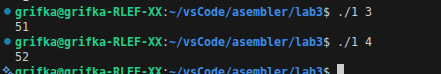

format ELF64
public _start

;((((a-c)*b)/c)*a)
section '.text' executable
_start:
    ; 1. Проверяем количество аргументов ( argc должно быть 4: имя + a + b + c)
    mov rax, [rsp]
    cmp rax, 4
    jne error_exit          ; Изменил jl на jne для строгости

    ; 2. Извлекаем аргументы и переводим в числа
    mov rsi, [rsp + 16]     ; адрес строки 'a'
    call atoi
    mov [a_val], rax

    mov rsi, [rsp + 24]     ; адрес строки 'b'
    call atoi
    mov [b_val], rax

    mov rsi, [rsp + 32]     ; адрес строки 'c'
    call atoi
    mov [c_val], rax

    ; 3. ВЫЧИСЛЕНИЯ: ((((a - c) * b) / c) * a)
    mov rax, [a_val]
    sub rax, [c_val]        ; rax = a - c (может быть отрицательным)
    
    imul rax, [b_val]       ; rax = (a - c) * b (знаковое умножение)
    
    ; Подготовка к знаковому делению
    mov rbx, [c_val]
    test rbx, rbx           ; Проверка на деление на 0
    jz error_exit           ; Если c == 0, выходим с ошибкой
    
    cqo                     ; РАСШИРЕНИЕ ЗНАКА: RAX -> RDX:RAX (обязательно для idiv)
    idiv rbx                ; ЗНАКОВОЕ ДЕЛЕНИЕ: rax = rax / c
    
    imul rax, [a_val]       ; rax = rax * a

    ; 4. Печать результата 
    call print_int

    ; Печать переноса строки
    mov rax, 1
    mov rdi, 1
    mov rsi, nl
    mov rdx, 1
    syscall

; -------------------------------- ВЫХОД И ОБРАБОТКА ОШИБОК ------------------ --------------.
exit:
    mov eax, 60
    xor edi, edi
    syscall

error_exit:
    mov eax, 60
    mov edi, 1
    syscall

; -------------------------------- Функции ------------------ --------------
; Функция для конвертации строки в число
atoi:
    xor rax, rax            ; здесь будет результат
.loop:
    movzx rbx, byte [rsi]   ; берем символ
    test bl, bl             ; если конец строки (0), выходим
    jz .done
    cmp bl, '0'
    jb .done
    cmp bl, '9'
    ja .done
    sub bl, '0'             ; символ '5' превращаем в число 5
    imul rax, 10            ; умножаем текущий результат на 10
    add rax, rbx            ; добавляем новую цифру
    inc rsi                 ; следующий символ
    jmp .loop
.done:
    ret

; Функция для печати целого числа
print_int:
; сохранение регистров, так как мы будем использовать rax, rdi, rsi, rdx
    push rax  
    push rcx 
    push rdx
    push rdi
    push rsi

    ; Обработка отрицательного числа перед конвертацией
    test rax, rax
    jns .prepare_convert    ; Если положительное, идем к конвертации

    push rax                ; Сохраняем RAX перед syscall
    mov rax, 1              ; sys_write
    mov rdi, 1              ; stdout
    mov rsi, minus_char
    mov rdx, 1
    syscall
    pop rax
    neg rax                 ; Делаем число положительным для деления (div)

.prepare_convert:
    mov rcx, 10
    mov rdi, print_buffer + 31
    
.convert_loop: ; метка для цикла конвертации числа в строку
    xor rdx, rdx 
    div rcx
    add dl, '0' ; превращаем цифру в символ
    mov [rdi], dl 
    dec rdi 
    test rax, rax ; проверяем, не закончились ли цифры
    jnz .convert_loop 

    inc rdi ; теперь rdi указывает на начало строки
    mov rsi, rdi ; rsi будет указывать на начало строки для печати
    mov rdx, print_buffer + 31 ; rdx будет указывать на конец строки
    sub rdx, rsi ; вычисляем длину строки
    inc rdx ; включаем последний символ в длину

    mov rax, 1      ; sys_write
    mov rdi, 1      ; stdout 
    syscall

; восстановление регистров и возврат
    pop rsi
    pop rdi
    pop rdx
    pop rcx
    pop rax
    ret

;-------------------------------- ДАННЫЕ ------------------ --------------
section '.data' writeable 
    a_val        dq 0
    b_val        dq 0
    c_val        dq 0
    nl           db 10
    minus_char   db '-'  
    print_buffer rb 32

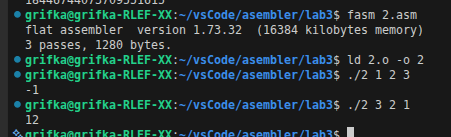

#include <stdio.h>
#include <stdlib.h> 

int main(int argc, char *argv[]) {
    // 1. Проверяем количество аргументов (ровно 4)
    if (argc != 4) {
        printf("Ошибка: нужно ввести 3 числа (a, b, c)\n");
        return 1;
    }

    // 2. Извлекаем аргументы и переводим их в числа типа long
    // argv[1] - это 'a', argv[2] - это 'b', argv[3] - это 'c'
    long a = atol(argv[1]);
    long b = atol(argv[2]);
    long c = atol(argv[3]);

    // Проверка на деление на ноль, как и в ассемблере
    if (c == 0) {
        printf("Ошибка: деление на ноль\n");
        return 1;
    }

    // 3. Расчет значения арифметического выражения: ((((a-c)*b)/c)*a)
    long result = ((((a - c) * b) / c) * a);

    // 4. Вывод результата на экран
    printf("%ld\n", result);

    return 0;
}